### 1. Cleaning the Twitter Data

In [ ]:
# Import necessary libraries
import pandas as pd
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stopword_list = nltk.corpus.stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import wordnet

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
import datetime

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Read in and preview 'tesla_data.csv'

tweets = pd.read_csv('S3_2_data.csv').drop(['Unnamed: 0'],axis=1)
tweets.head()

,id,date,tweet,retweets_count
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0


In [ ]:
# Convert date_time column into datetime stamp
tweets.date = pd.to_datetime(tweets.date)

### 2. Clean & Tokenize Tweets

In [ ]:
def cleaner(dataframe):
    # Add whitespace to the end of every tweet
    dataframe['cleaned_tweet'] = dataframe.tweet.map(lambda x: x + " ")
    # Remove http links
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: re.sub(r'http.*', '', x))
    # Remove special characters and numbers
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: re.sub(r"[^a-zA-Z#]", ' ', x))
    # Lowercase all tweets
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: x.lower())
    #Tokenize tweets and remove stop words
    stopword_list = stopwords.words('english')
    for i in range(len(dataframe.cleaned_tweet)):
        tokens = word_tokenize(dataframe.cleaned_tweet[i])
        clean_tokens = [w for w in tokens if w not in stopword_list]
        dataframe.cleaned_tweet[i] = clean_tokens

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab') # Download the punkt_tab resource

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
cleaner(tweets)
tweets.head()

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataframe.cleaned_tweet[i] = clean_tokens
<ipython-input-39-e829423eb5be>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe.cleaned_tweet[i] = clean_tokens
<ipython-input-39-e829423eb5be>:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical exampl

,id,date,tweet,retweets_count,cleaned_tweet
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2,"[fun, fact, audi, registered, e, tron, netherl..."
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0,"[mf, tsla, stock, watch, shit, go, damn, year,..."
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0,"[icannot, enough, june, th, within, days, tsla..."
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15,"[tesla, gaining, momentum, taiwan, teslaowners..."
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0,"[schuldensuehner, extrapolate, numbers, anothe..."


### 3. Lemmatize Tweets

In [ ]:
tweets.cleaned_tweet[0]

['fun',
 'fact',
 'audi',
 'registered',
 'e',
 'tron',
 'netherlands',
 'q',
 'tesla',
 'sux',
 'combined',
 'q',
 'obviously',
 'orders',
 'magnitudes',
 'tesla',
 'q',
 'tslaq',
 'tsla']

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')  # for multilingual WordNet support


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
def tweet_lemmatizer(tweets):

    for i in range(len(tweets)):
        # Pos-tag each word in tweet
        for word in [tweets[i]]:
            pos_tag_list = nltk.pos_tag(word)
        # Convert pos-tag to be wordnet compliant
        wordnet_tags = []
        for j in pos_tag_list:
            # Adjective
            if j[1].startswith('J'):
                wordnet_tags.append(wordnet.ADJ)
            # Noun
            elif j[1].startswith('N'):
                wordnet_tags.append(wordnet.NOUN)
            # Adverb
            elif j[1].startswith('R'):
                wordnet_tags.append(wordnet.ADV)
            # Verb
            elif j[1].startswith('V'):
                wordnet_tags.append(wordnet.VERB)
            # Default to noun
            else:
                wordnet_tags.append(wordnet.NOUN)
        # Lemmatize each word in tweet
        lem_words = []
        for k in range(len(tweets[i])):
            lem_words.append(lemmatizer.lemmatize(tweets[i][k], pos=wordnet_tags[k]))
        lem_tweet = ' '.join(lem_words)
        tweets[i] = lem_tweet

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [ ]:
tweet_lemmatizer(tweets.cleaned_tweet)
tweets

Streaming output truncated to the last 5000 lines.
<ipython-input-57-626d34f6d40e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i] = lem_tweet
<ipython-input-57-626d34f6d40e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i] = lem_tweet
<ipython-input-57-626d34f6d40e>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets[i] = lem_tweet
<ipython-input-57-626d34f6d40e>:30: SettingWithCopyWarning: 
A value is tryi

,id,date,tweet,retweets_count,cleaned_tweet
0,1212450794705969152,2020-01-02,Fun fact: Audi registered more E-Tron's in the...,2,fun fact audi register e tron netherlands q te...
1,1212450579634626560,2020-01-02,That MF TSLA stock at 420.. I watch that shit ...,0,mf tsla stock watch shit go damn year miss curve
2,1212450337543602177,2020-01-02,@ICannot_Enough And on June 5 th 2019 within 2...,0,icannot enough june th within day tsla low rep...
3,1212450309131227141,2020-01-02,Tesla is gaining momentum in Taiwan 🇹🇼 @TeslaO...,15,tesla gain momentum taiwan teslaownerstwn tsla...
4,1212449703318753280,2020-01-02,@Schuldensuehner Now extrapolate these numbers...,0,schuldensuehner extrapolate number another two...
...,...,...,...,...,...
113736,1344758979721789440,2021-01-01,#TSLA whales stepping in for the last day of t...,1,# tsla whale step last day year
113737,1344758920775086081,2021-01-01,I’ve always wanted to get into investing and t...,0,always want get invest understand stock market...
113738,1344758902856945664,2021-01-01,@RampCapitalLLC $OPEN little buddy told me is ...,0,rampcapitalllc open little buddy tell run mayb...
113739,1344758889393184769,2021-01-01,Fantastic week. Thanks for the huge support in...,1,fantastic week thanks huge support look forwar...


In [ ]:
tweets.cleaned_tweet[0]

'fun fact audi register e tron netherlands q tesla sux combine q obviously order magnitude tesla q tslaq tsla'

In [ ]:
# Remove 'tesla, 'tsla', 'q', and '#'

def final_cleaner(dataframe):
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: x.replace('#',''))
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: x.replace('q',''))
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: x.replace('tesla',''))
    dataframe.cleaned_tweet = dataframe.cleaned_tweet.map(lambda x: x.replace('tsla',''))

In [ ]:
final_cleaner(tweets)

In [ ]:
# Join all the tweets into a single string
all_words_string = ' '.join([tweet for tweet in tweets.cleaned_tweet])

# Make a list of all the words in the dataframe
all_words_list = all_words_string.split()

### 4. Frequency Analysis

<Axes: xlabel='Samples', ylabel='Counts'>

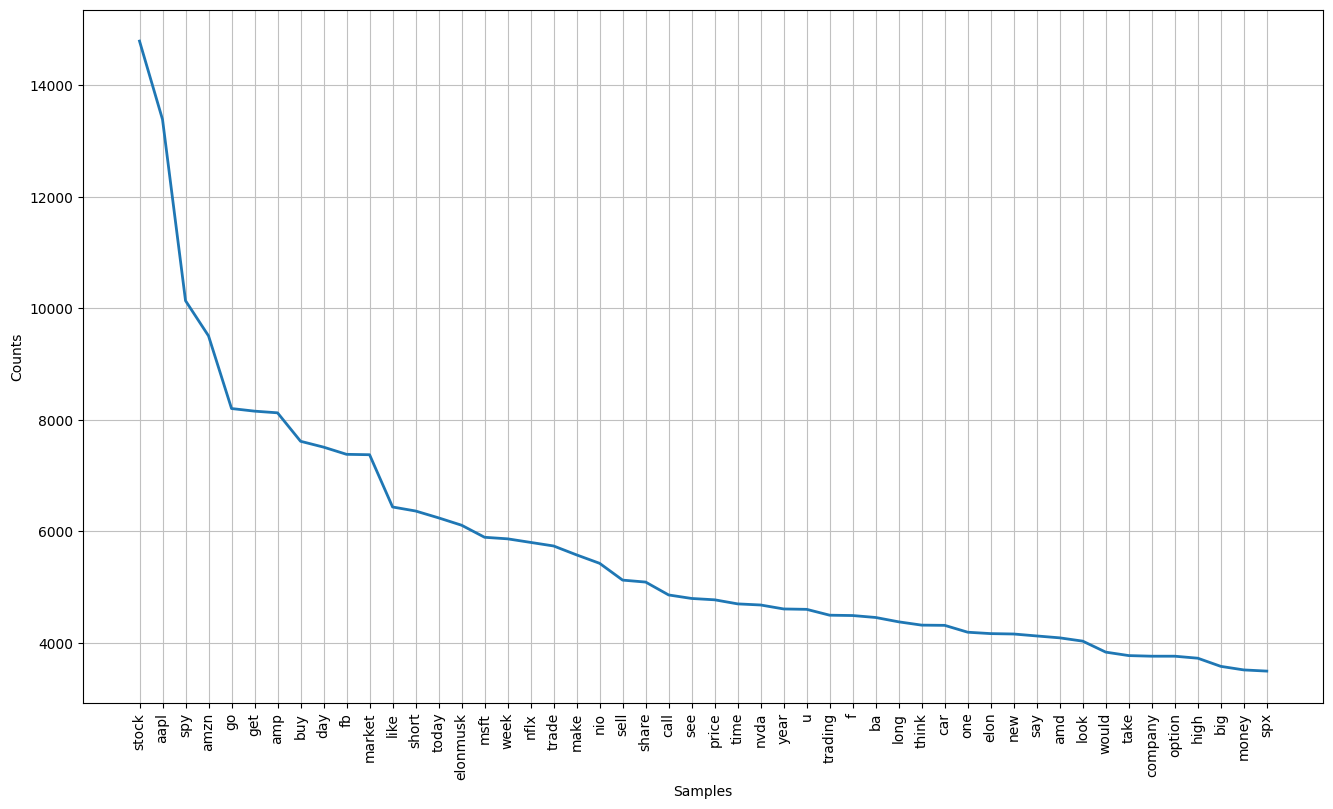

In [ ]:
# Plot word frequency distribution of first few words
plt.figure(figsize=(16,9))
plt.xticks(fontsize=10, rotation=90)
freq_dist = nltk.FreqDist(all_words_list)
freq_dist.plot(50, cumulative=False)

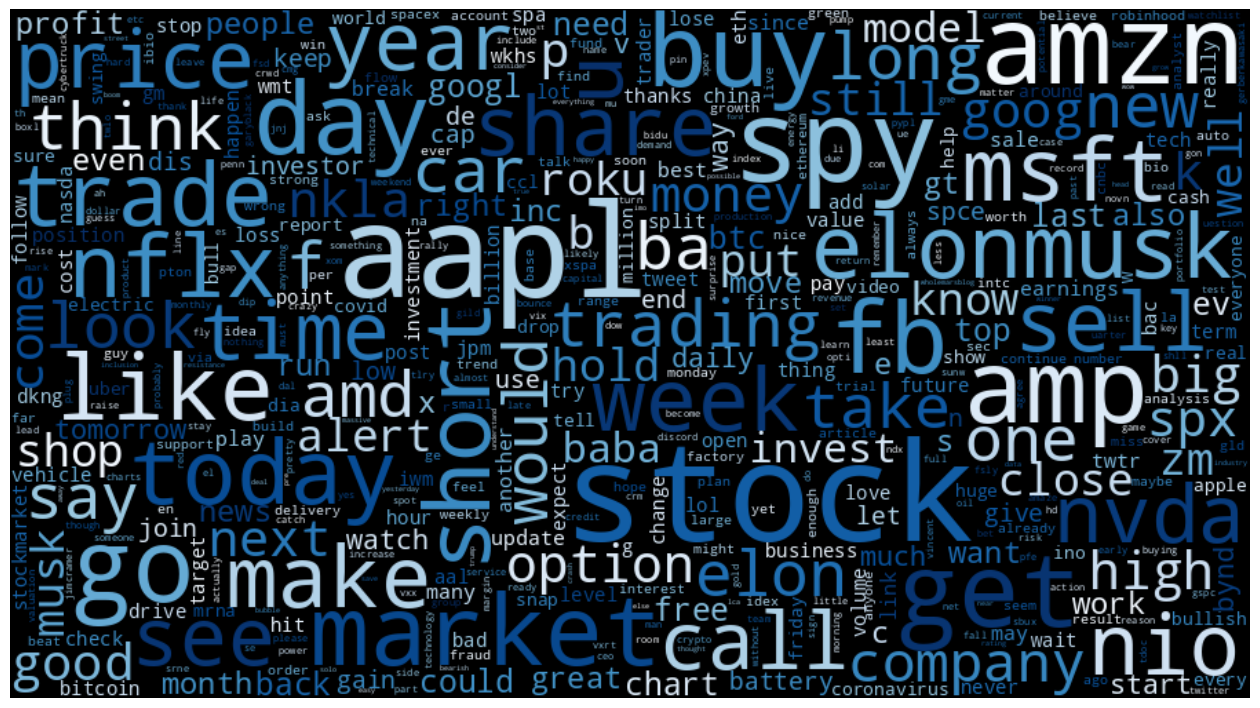

In [ ]:
# Word Cloud with word frequencies

wordcloud = WordCloud(width=900,
                      height=500,
                      max_words=500,
                      max_font_size=100,
                      relative_scaling=0.5,
                      colormap='Blues',
                      normalize_plurals=True).generate_from_frequencies(freq_dist)
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Find the frequency of each word in the dataframe

word_freq = nltk.FreqDist(all_words_list)
freq_df = pd.DataFrame({'Word': list(word_freq.keys()), 'Count': list(word_freq.values())}).sort_values(by=['Count'], ascending=False)
freq_df.head(10)

,Word,Count
13,stock,14789
126,aapl,13384
301,spy,10135
129,amzn,9504
16,go,8202
66,get,8155
43,amp,8125
408,buy,7615
26,day,7510
1009,fb,7381


<ipython-input-68-9653d8ca9284>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)


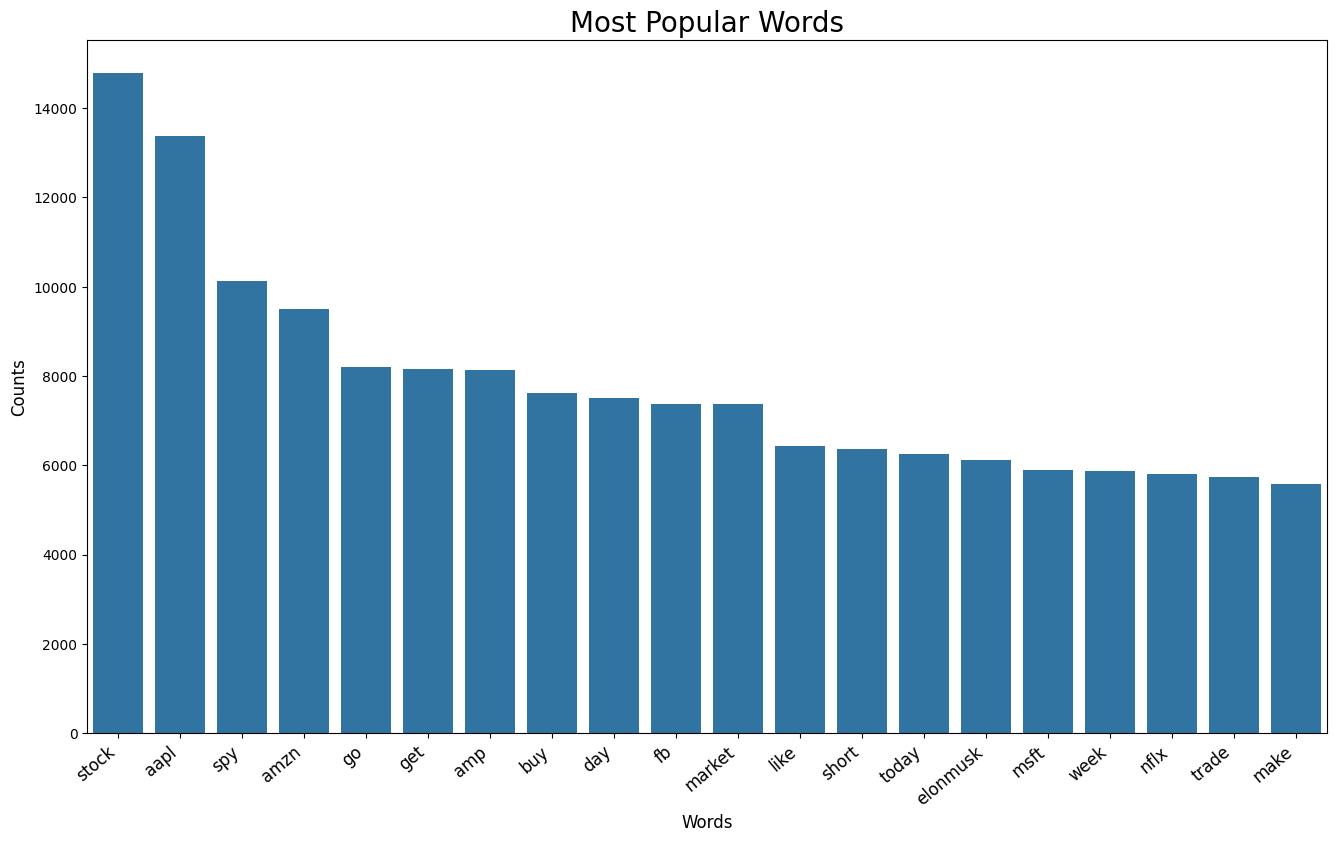

In [ ]:
# Plot histogram of most frequent words

freq_df = freq_df.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,9))
ax = sns.barplot(data=freq_df, x= "Word", y = "Count")
ax.set_ylabel('Counts', fontsize=12)
ax.set_xlabel('Words', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=12)
ax.set_title("Most Popular Words", fontsize=20)
plt.show()

### 5. Save the Cleaned Tweets

In [ ]:
tweets.to_csv('cleaned_data.csv', index = False)